In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv('../inputs/Train.csv')
df_test=pd.read_csv('../inputs/Test.csv')

In [4]:
df_train.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_Code      12666 non-null  int64  
 1   Locality_Code  12666 non-null  int64  
 2   Region_Code    12666 non-null  int64  
 3   Height         12666 non-null  float64
 4   Diameter       12666 non-null  float64
 5   Class          12666 non-null  int64  
 6   Species        12666 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 692.8 KB


In [6]:
df_train.describe()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
count,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000
mean,15790.986815,11.199274,1101.209300,5.600016,29.060003,3.632402,143.676772
std,9529.776852,5.811277,630.354516,3.561108,21.561272,2.119160,79.880127
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6548.500000,6.000000,569.000000,3.000000,13.000000,2.000000,72.000000
50%,15568.000000,11.000000,1099.000000,5.000000,25.000000,3.000000,172.000000
75%,25251.000000,16.000000,1650.000000,7.500000,39.000000,6.000000,203.000000
max,30897.000000,21.000000,2184.000000,60.000000,180.000000,7.000000,262.000000


In [14]:
df_train.isnull().sum(),df_test.isnull().sum()

(Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Class            0
 Species          0
 dtype: int64,
 Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Species          0
 dtype: int64)

In [13]:
for f in df_train.columns:
    print(f,df_train[f].nunique())

Area_Code 10122
Locality_Code 21
Region_Code 1870
Height 92
Diameter 132
Class 8
Species 222


In [10]:
for f in df_train.columns:
    print(df_train[f].value_counts())

28502    367
28522     47
4638      45
28518     39
4557      35
        ... 
6582       1
29107      1
14770      1
8625       1
2049       1
Name: Area_Code, Length: 10122, dtype: int64
10    927
15    844
12    754
17    723
4     711
11    683
13    670
8     635
20    619
3     607
16    570
6     522
21    517
9     515
18    511
14    511
1     511
19    503
5     491
2     456
7     386
Name: Locality_Code, dtype: int64
0       80
834     61
970     60
1432    55
2002    53
        ..
2180     1
658      1
539      1
1182     1
1533     1
Name: Region_Code, Length: 1870, dtype: int64
3.0     3327
7.5     1955
4.0      924
5.0      750
0.0      594
        ... 
4.7        1
20.5       1
6.3        1
1.6        1
11.9       1
Name: Height, Length: 92, dtype: int64
8.0      752
35.0     541
25.0     476
20.0     460
0.0      419
        ... 
138.0      1
150.0      1
121.0      1
180.0      1
2.0        1
Name: Diameter, Length: 132, dtype: int64
3    3730
6    3425
2    2473
1   

In [54]:
df_train.groupby('Class').agg({'Locality_Code':['min','max','mean','std'],
                              'Region_Code':['min','max','mean','std'],
                              'Height':['min','max','mean','std'],
                                   'Diameter':['min','max','mean','std'],
                                  'Species':['min','max','mean','std']})

Locality_Code                          Region_Code                     \
                min max       mean       std         min   max         mean   
Class                                                                         
0                 1  21  11.519718  5.533234           0  2182  1086.478873   
1                 1  21  11.288669  5.584821           0  2180  1084.602518   
2                 1  21  11.210675  5.874401           0  2181  1077.194096   
3                 1  21  11.775603  5.777245           0  2184  1130.743968   
4                 1  20  10.185185  6.868232          89  2176  1355.796296   
5                 1  21  11.342857  6.417561          66  2132  1210.800000   
6                 1  21  10.512701  5.787103           0  2184  1087.910365   
7                 1  21  11.099817  5.945530           0  2181  1103.297619   

                  Height                            Diameter         \
              std    min   max       mean       std      min    max   
Class                                                                 
0      631.177663    0.0  25.0   1.567183  2.987271      0.0  140.0   
1      620.536306    0.0  35.0   3.510612  1.533700      0.0   55.0   
2      622.747710    0.0  30.0   4.593368  2.036926      0.0  105.0   
3      636.046664    0.0  60.0   8.100456  3.881086      0.0  180.0   
4      596.564358    0.0   3.0   0.135185  0.551210      0.0   92.0   
5      674.920277    2.0  35.0  10.455714  5.098554      5.0  140.0   
6      633.162049    0.0  50.0   5.993898  2.751703      0.0  100.0   
7      621.803272    0.0  50.0   2.812179  1.657980      0.0   36.0   

                            Species                              
            mean        std     min  max        mean        std  
Class                                                            
0       9.218310  20.526056       0  260  221.009859  73.411672  
1      11.934353   4.875794       0  260  136.903777  71.330399  
2      19.143550   8.641738       0  262  132.482410  75.019457  
3      49.558713  21.440956       0  262  151.048525  80.061136  
4       9.129630  13.377038      18  260  209.666667  66.350982  
5      77.157143  28.714807       5  260  143.657143  70.155084  
6      29.871825  11.642388       0  262  133.119124  79.567632  
7       7.195055   2.941447       0  260  130.315934  71.984582

In [29]:
df_train.groupby('Area_Code').agg({'Locality_Code':['min','max','count','mean'],
                              'Region_Code':['min','max','mean','count'],
                              'Height':['min','max','mean','count'],
                                   'Diameter':['min','max','mean','count'],
                                  'Species':['min','max','mean','count']})

Locality_Code                 Region_Code                      \
                    min max count  mean         min   max    mean count   
Area_Code                                                                 
2                    10  10     1  10.0         163   163   163.0     1   
4                     2   2     1   2.0         713   713   713.0     1   
6                     4   4     1   4.0         426   426   426.0     1   
7                    15  15    15  15.0         453   453   453.0    15   
8                     4   4     2   4.0         456  2105  1280.5     2   
...                 ...  ..   ...   ...         ...   ...     ...   ...   
30889                10  10     1  10.0         781   781   781.0     1   
30890                15  15     1  15.0        2044  2044  2044.0     1   
30892                19  19     4  19.0         575   575   575.0     4   
30893                 1   1     1   1.0         261   261   261.0     1   
30897                10  10     1  10.0         781   781   781.0     1   

          Height                        Diameter                     Species  \
             min   max       mean count      min    max   mean count     min   
Area_Code                                                                      
2           14.5  14.5  14.500000     1     78.0   78.0   78.0     1     203   
4            0.0   0.0   0.000000     1      8.0    8.0    8.0     1       0   
6           12.5  12.5  12.500000     1     52.0   52.0   52.0     1     248   
7            0.0  12.5   5.066667    15      0.0  120.0   30.6    15     132   
8            3.0   3.0   3.000000     2      8.0   15.0   11.5     2      54   
...          ...   ...        ...   ...      ...    ...    ...   ...     ...   
30889        9.5   9.5   9.500000     1     42.0   42.0   42.0     1      14   
30890        7.0   7.0   7.000000     1     46.0   46.0   46.0     1     217   
30892        4.5  10.5   7.000000     4     20.0   64.0   35.5     4      20   
30893        5.0   5.0   5.000000     1     30.0   30.0   30.0     1     220   
30897       17.0  17.0  17.000000     1    100.0  100.0  100.0     1     203   

                              
           max    mean count  
Area_Code                     
2          203  203.00     1  
4            0    0.00     1  
6          248  248.00     1  
7          257  210.20    15  
8          225  139.50     2  
...        ...     ...   ...  
30889       14   14.00     1  
30890      217  217.00     1  
30892      255  128.75     4  
30893      220  220.00     1  
30897      203  203.00     1  

[10122 rows x 20 columns]

In [19]:
df_train.groupby('Height').agg({'Area_Code':['min','max','mean'],
                              'Locality_Code':['min','max','mean'],
                              'Region_Code':['min','max','mean'],
                               'Diameter':['min','max','mean']
                              })

Area_Code                      Locality_Code                 \
             min    max          mean           min max       mean   
Height                                                               
0.0            4  30863  13528.075758             1  21  11.067340   
0.3         4557   4557   4557.000000            20  20  20.000000   
0.5         5259  28170  17605.800000             1   9   7.400000   
1.0          240  30859  16316.962264             1  21  10.075472   
1.5          790  28825  14568.666667             3  20  11.041667   
...          ...    ...           ...           ...  ..        ...   
30.0       28530  28530  28530.000000            17  17  17.000000   
35.0        4925  28502  16713.500000            10  17  13.500000   
40.0       28965  29886  29425.500000            14  14  14.000000   
50.0        4557  30855  17706.000000            14  17  15.500000   
60.0       30876  30876  30876.000000             4   4   4.000000   

       Region_Code                    Diameter                    
               min   max         mean      min    max       mean  
Height                                                            
0.0             20  2182  1152.191919      0.0   92.0   3.728956  
0.3            970   970   970.000000      8.0    8.0   8.000000  
0.5            408  2021  1123.800000      3.0   53.0  22.000000  
1.0             11  2112  1035.811321      0.0   40.0   7.188679  
1.5            181  1962   954.125000      4.0  130.0  11.583333  
...            ...   ...          ...      ...    ...        ...  
30.0           568   568   568.000000     25.0   25.0  25.000000  
35.0           234   248   241.000000     20.0  124.0  72.000000  
40.0           112  1661   886.500000      0.0    0.0   0.000000  
50.0           112   566   339.000000      0.0    5.0   2.500000  
60.0           421   421   421.000000      0.0    0.0   0.000000  

[92 rows x 12 columns]

In [20]:
df_train.groupby('Diameter').agg({'Area_Code':['min','max','mean'],
                              'Locality_Code':['min','max','mean'],
                              'Region_Code':['min','max','mean'],
                              'Height':['min','max','mean'],
                                  'Species':['min','max','mean','count']
                              })

Area_Code                      Locality_Code                 \
               min    max          mean           min max       mean   
Diameter                                                               
0.0              7  30876  15151.596659             1  21  11.618138   
1.0           1120  29942  12760.709677             1  20  10.774194   
2.0          16532  16532  16532.000000            19  19  19.000000   
3.0            856  28502  13045.923077             1  21  11.692308   
4.0            730  30053  15244.957447             2  21  10.234043   
...            ...    ...           ...           ...  ..        ...   
136.0        28502  28502  28502.000000            17  17  17.000000   
138.0         6252   6252   6252.000000            15  15  15.000000   
140.0         4391  29476  13817.000000             2  15  10.666667   
150.0        28529  28529  28529.000000            14  14  14.000000   
180.0         4557   4557   4557.000000            15  15  15.000000   

         Region_Code                    Height                   
                 min   max         mean    min   max       mean  
Diameter                                                         
0.0               20  2182  1112.069212    0.0  60.0   0.968974  
1.0               77  2172  1181.483871    0.0   7.5   2.629032  
2.0             1372  1372  1372.000000    7.0   7.0   7.000000  
3.0               11  1678   774.076923    0.5   3.0   1.923077  
4.0                0  2177  1068.617021    0.5   3.0   2.180851  
...              ...   ...          ...    ...   ...        ...  
136.0            570   570   570.000000   22.5  22.5  22.500000  
138.0            966   966   966.000000   25.0  25.0  25.000000  
140.0            966  2046  1662.000000    3.0  10.0   7.666667  
150.0           1102  1102  1102.000000   23.0  23.0  23.000000  
180.0           1310  1310  1310.000000    9.5   9.5   9.500000  

[132 rows x 12 columns]

In [50]:
df_train.groupby('Locality_Code').agg({'Area_Code':['min','max','mean'],
                              'Region_Code':['min','max','mean'],
                              'Height':['max','mean'],
                               'Diameter':['max','mean'],
                                       'Species':['min','max','mean','count']
                              })

Area_Code                      Region_Code                     \
                    min    max          mean         min   max         mean   
Locality_Code                                                                 
1                   206  30893  14279.479452          62  2178   965.596869   
2                     4  30831  15852.456140           0  2145  1122.951754   
3                    16  30467  14888.942339          42  2180  1106.619440   
4                     6  30876  16577.793249           0  2143  1030.856540   
5                   118  30794  20044.543788           4  2156   988.492872   
6                    12  30761  17380.114943          29  2122   986.501916   
7                    26  30791  14494.189119           8  2033  1020.523316   
8                    39  30872  15881.984252           0  2131  1069.288189   
9                   240  30728  16204.586408           0  2124   989.277670   
10                    2  30897  16353.116505          20  2126  1110.294498   
11                   64  30772  15087.594436          26  2166  1113.314788   
12                   38  30848  13945.820955           0  2179  1156.583554   
13                   29  30859  14279.770149           0  2177  1159.071642   
14                   85  30859  19281.039139          47  2174  1142.549902   
15                    7  30890  15105.315166           0  2151  1101.662322   
16                  173  30859  15515.375439          43  2184  1107.845614   
17                   34  30881  16106.147994          63  2162  1194.715076   
18                   30  30829  16033.281800          25  2142  1247.739726   
19                  227  30892  15827.864811           0  2172  1138.823062   
20                   15  30863  14898.573506           0  2181  1142.371567   
21                  169  30679  14904.891683           5  2173  1141.866538   

              Height           Diameter            Species                   \
                 max      mean      max       mean     min  max        mean   
Locality_Code                                                                 
1               22.5  6.229550    116.0  31.741683       0  257  119.659491   
2               17.5  5.333991    140.0  31.701754       0  260  147.872807   
3               20.5  5.506919    125.0  27.392092       0  260  146.930807   
4               60.0  4.872574    130.0  19.381153       0  260  146.199719   
5               23.0  6.528921    115.0  34.828921       0  258  138.906314   
6               22.0  5.468966    130.0  30.053640       0  260  131.676245   
7               19.5  6.243782    114.0  29.401554       5  258  137.647668   
8               22.5  4.656220    130.0  25.959055       1  260  146.266142   
9               25.0  6.311456    130.0  31.619417       0  260  145.961165   
10              35.0  5.719957    112.0  27.014024       5  262  149.660194   
11              20.0  5.340410    100.0  28.950220       5  260  156.773060   
12              18.0  4.766844    128.0  27.370027       0  260  154.054377   
13              22.5  4.855373    120.0  28.350746       0  260  148.756716   
14              50.0  6.459883    150.0  35.381605       0  262  134.859100   
15              25.0  5.604147    180.0  31.986967       0  260  143.599526   
16              21.0  6.294737    108.0  28.689474       2  258  134.492982   
17              50.0  6.760166    136.0  31.160443       0  258  138.755187   
18              22.5  5.282192    115.0  27.086106       0  258  132.679061   
19              20.0  5.417694    110.0  29.212724       0  260  138.542744   
20              22.0  4.830048    130.0  28.612278       0  262  145.523425   
21              17.5  6.018569    114.0  29.851064       3  260  161.872340   

                     
              count  
Locality_Code        
1               511  
2               456  
3               607  
4               711  
5               491  
6               522  
7               386  


In [49]:
['_'.join(x) for x in df.columns]

['Area_Code_min',
 'Area_Code_max',
 'Area_Code_mean',
 'Region_Code_min',
 'Region_Code_max',
 'Height_max',
 'Height_mean',
 'Diameter_max',
 'Diameter_mean',
 'Species_min',
 'Species_max',
 'Species_mean',
 'Species_count']

Index(['Area_Code', 'Locality_Code', 'Region_Code', 'Height', 'Diameter',
       'Class', 'Species'],
      dtype='object')

In [51]:
import seaborn as sns

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


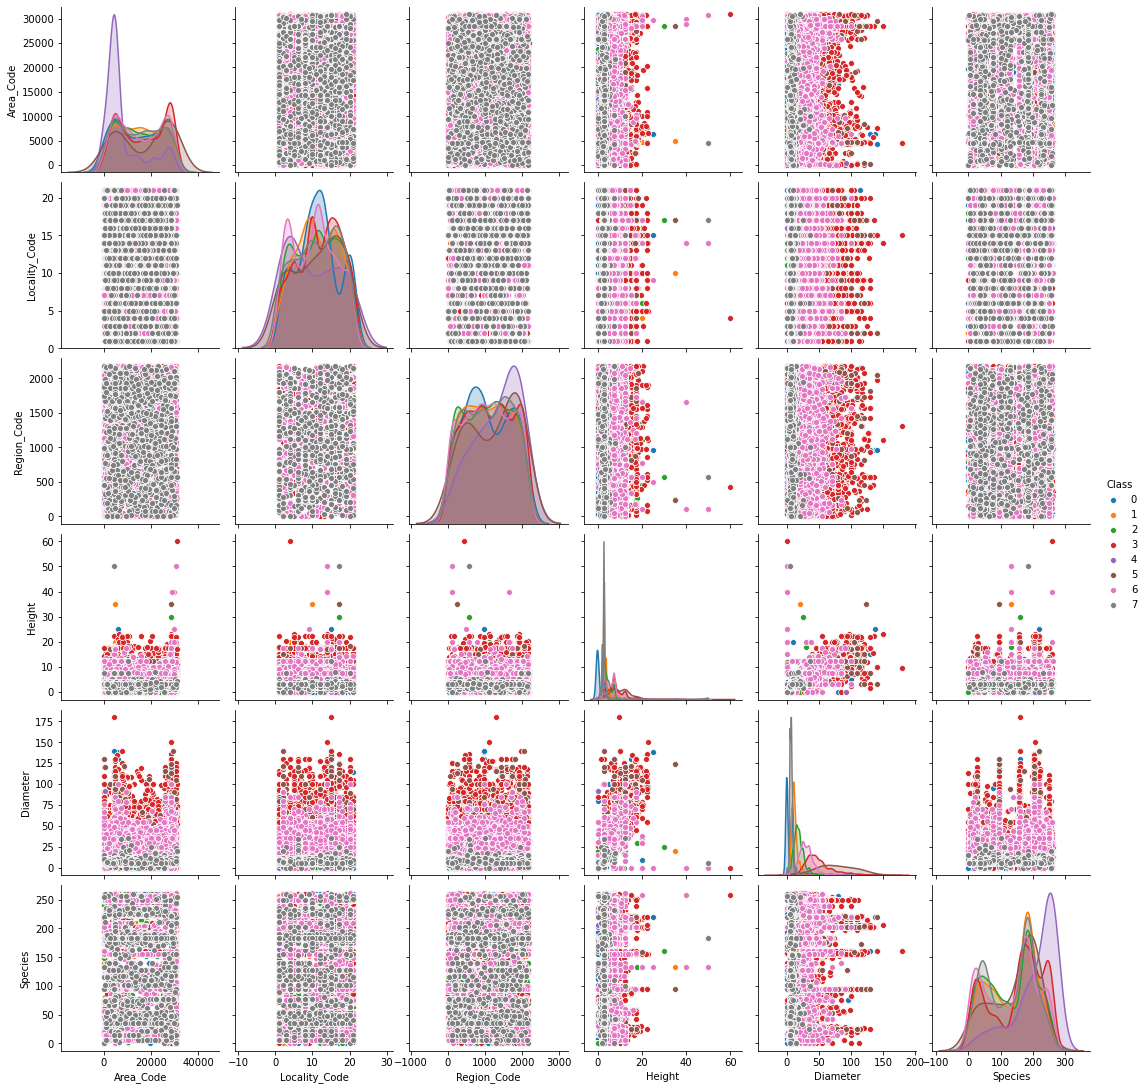

In [53]:
sns.pairplot(df_train,hue='Class');

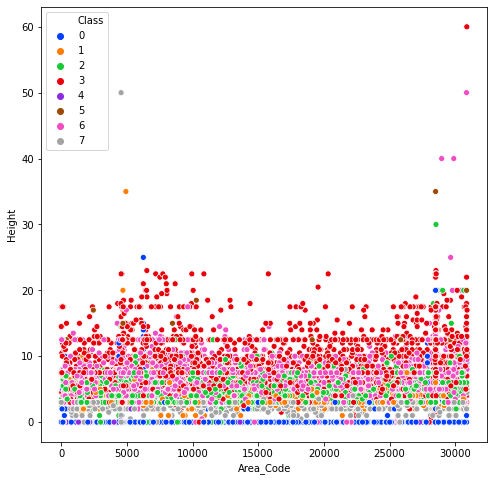

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Area_Code'],y=df_train['Height'],hue=df_train['Class'],palette='bright');

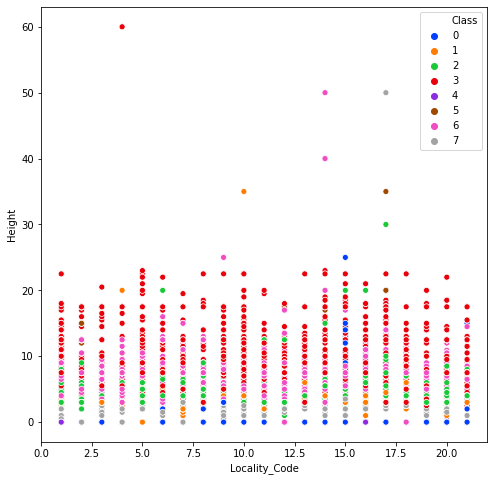

In [74]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Locality_Code'],y=df_train['Height'],hue=df_train['Class'],palette='bright');

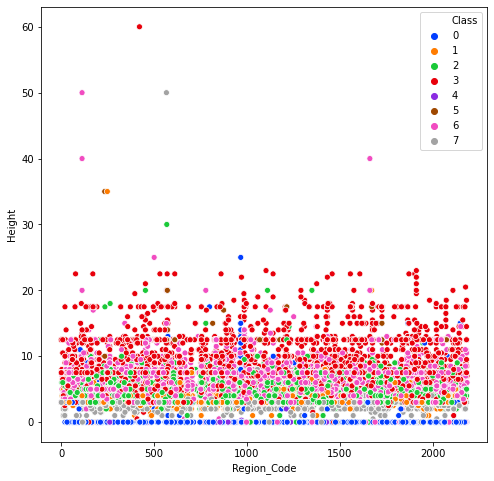

In [75]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Region_Code'],y=df_train['Height'],hue=df_train['Class'],palette='bright');

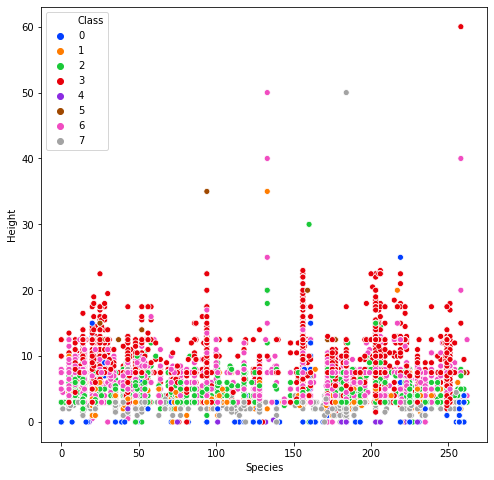

In [76]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Species'],y=df_train['Height'],hue=df_train['Class'],palette='bright');

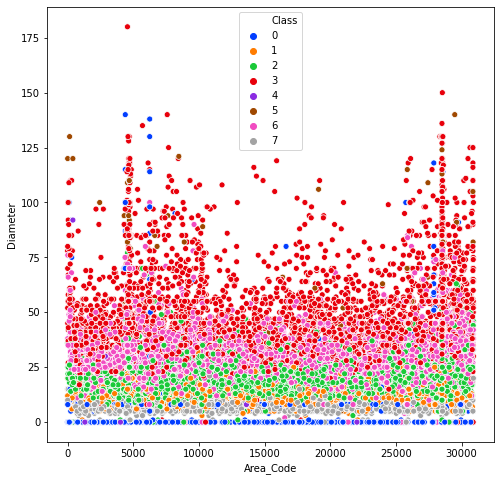

In [146]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Area_Code'],y=df_train['Diameter'],hue=df_train['Class'],palette='bright');

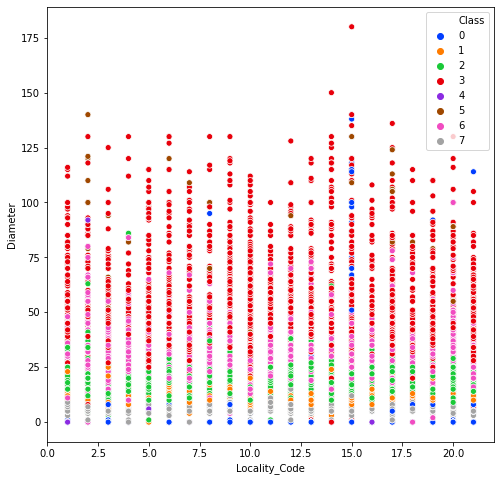

In [78]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Locality_Code'],y=df_train['Diameter'],hue=df_train['Class'],palette='bright');

In [112]:
plt.figure(figsize=(8,8))
sns.hexbins(x=df_train['Region_Code'],y=df_train['Diameter'],hue=df_train['Class'],palette='bright');

AttributeError: module 'seaborn' has no attribute 'hexbins'

<Figure size 576x576 with 0 Axes>

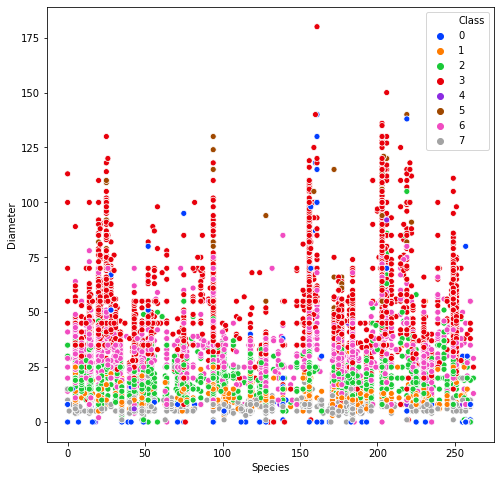

In [80]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Species'],y=df_train['Diameter'],hue=df_train['Class'],palette='bright');

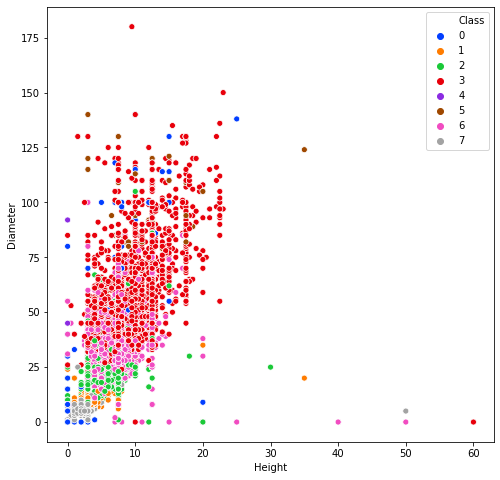

In [81]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_train['Height'],y=df_train['Diameter'],hue=df_train['Class'],palette='bright');

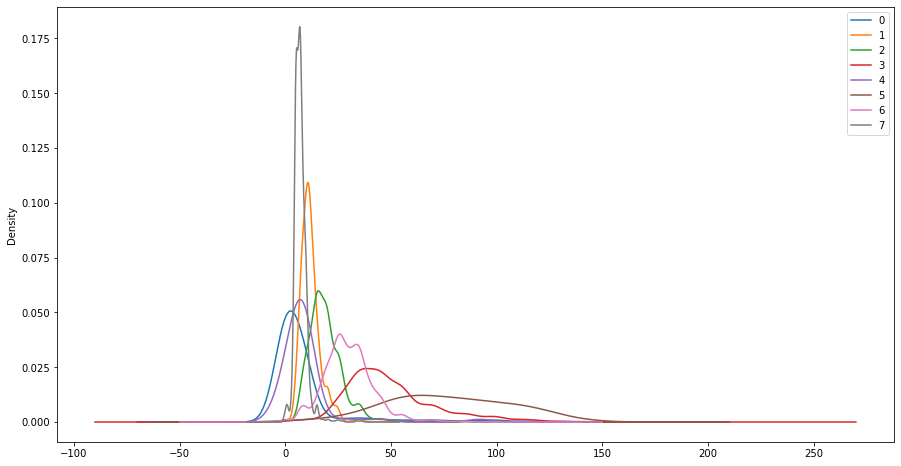

In [114]:
df_train.groupby('Class')['Diameter'].plot(kind='kde',figsize=(15,8),legend=True);

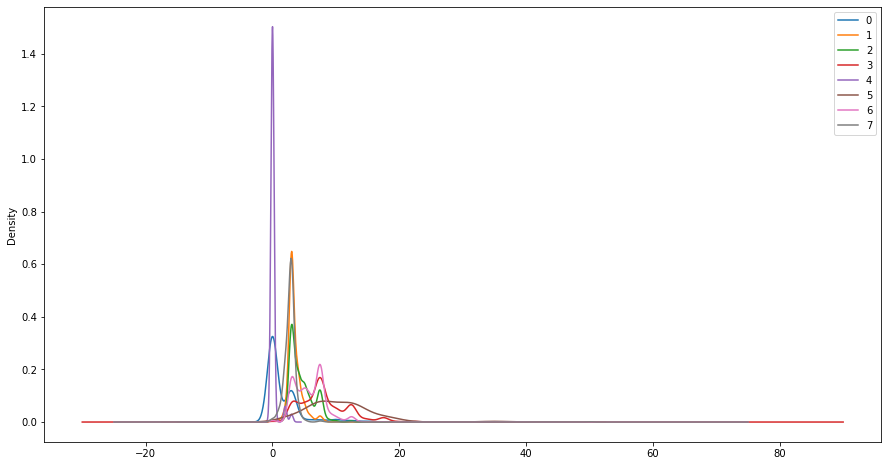

In [102]:
df_train.groupby('Class')['Height'].plot(kind='kde',figsize=(15,8),legend=True);

In [105]:
df=pd.concat([df_train,df_test],axis=0).drop('Class',axis=1)

In [109]:
df_train.groupby('Class').agg({
                              'Height':['min','max','mean','std'],
                                   'Diameter':['min','max','mean','std'],
})

Height                            Diameter                             
         min   max       mean       std      min    max       mean        std
Class                                                                        
0        0.0  25.0   1.567183  2.987271      0.0  140.0   9.218310  20.526056
1        0.0  35.0   3.510612  1.533700      0.0   55.0  11.934353   4.875794
2        0.0  30.0   4.593368  2.036926      0.0  105.0  19.143550   8.641738
3        0.0  60.0   8.100456  3.881086      0.0  180.0  49.558713  21.440956
4        0.0   3.0   0.135185  0.551210      0.0   92.0   9.129630  13.377038
5        2.0  35.0  10.455714  5.098554      5.0  140.0  77.157143  28.714807
6        0.0  50.0   5.993898  2.751703      0.0  100.0  29.871825  11.642388
7        0.0  50.0   2.812179  1.657980      0.0   36.0   7.195055   2.941447

In [137]:
sort_h=df_train['Height'].unique()
sort_h.sort()

In [138]:
sort_h

array([ 0. ,  0.3,  0.5,  1. ,  1.5,  1.6,  2. ,  2.5,  2.6,  2.8,  2.9,
        3. ,  3.1,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,
        4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  5. ,  5.1,  5.4,  5.5,
        5.6,  5.7,  5.8,  6. ,  6.3,  6.4,  6.5,  6.6,  6.8,  7. ,  7.4,
        7.5,  7.6,  7.8,  7.9,  8. ,  8.5,  8.6,  8.8,  9. ,  9.2,  9.3,
        9.4,  9.5, 10. , 10.1, 10.5, 10.9, 11. , 11.5, 11.9, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. ,
       18.5, 19. , 19.5, 20. , 20.5, 21. , 22. , 22.5, 23. , 25. , 30. ,
       35. , 40. , 50. , 60. ])

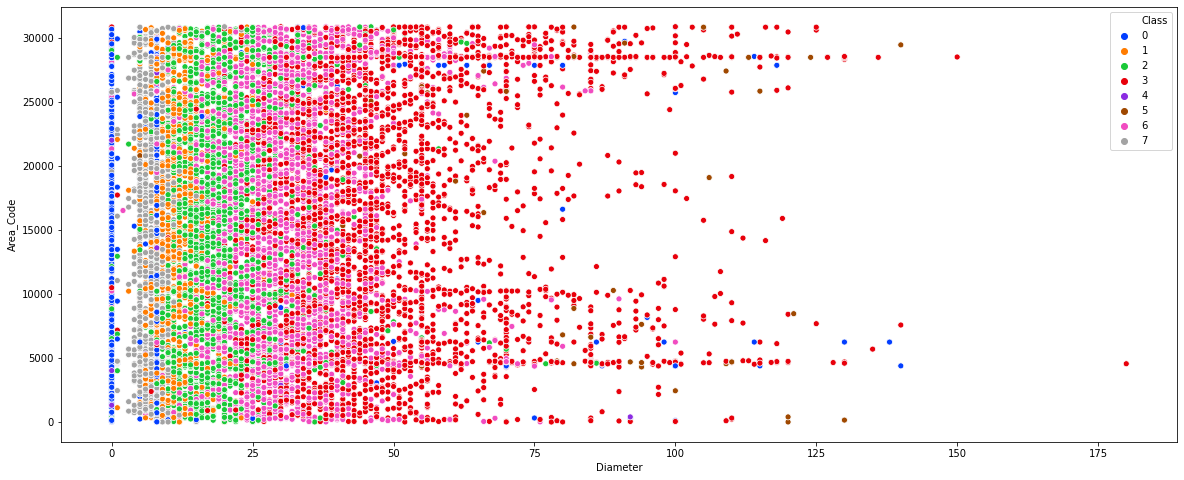

In [148]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df_train['Diameter'],y=df_train['Area_Code'],hue=df_train['Class'],palette='bright');

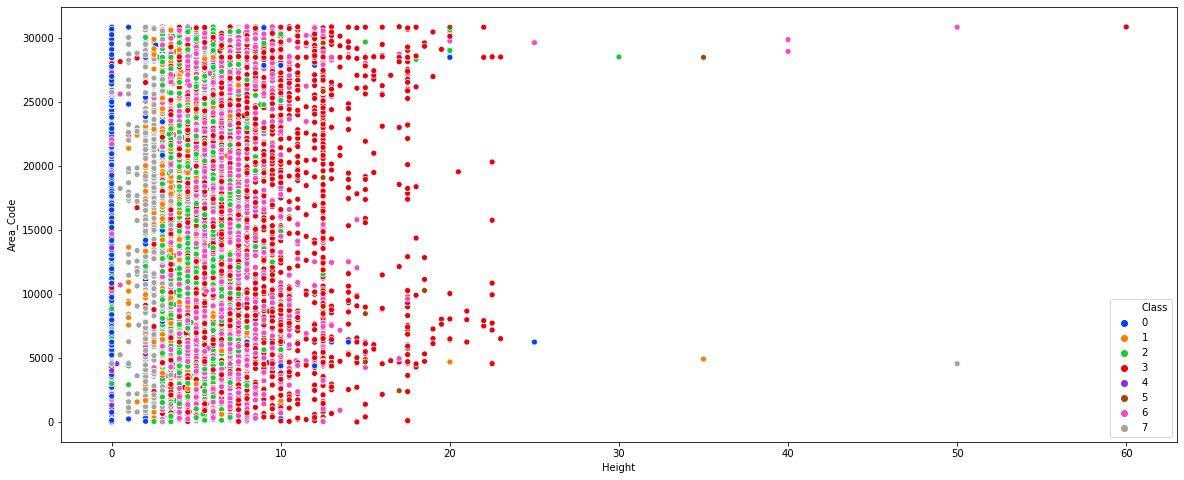

In [155]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df_train['Height'],y=df_train['Area_Code'],hue=df_train['Class'],palette='bright');

In [161]:
df_train.groupby(['Class','Height'])['Diameter'].count()

Class  Height
0      0.0       462
       1.0         4
       2.0        24
       2.6         1
       3.0       153
       3.5         2
       4.0         6
       4.5         1
       5.0         5
       5.5         1
       6.0         6
       7.0         5
       7.5         2
       8.0         5
       9.0         3
       10.0       10
       10.1        1
       11.0        2
       12.0        5
       12.5        1
       13.0        3
       14.0        1
       15.0        4
       17.5        1
       20.0        1
       25.0        1
1      0.0         7
       1.0         8
       1.5         2
       2.0        38
       2.5        27
       3.0       627
       3.1         2
       3.4         2
       3.5        77
       3.6         4
       3.8         2
       4.0       151
       4.1         1
       4.5        41
       4.6         1
       4.8         1
       5.0        52
       5.5        14
       6.0        18
       6.5         4
       6.8         1

In [162]:
df_train.groupby(['Class','Diameter'])['Height'].count()

Class  Diameter
0      0.0         363
       1.0           9
       4.0           1
       5.0          13
       6.0           3
       7.0           6
       8.0         223
       9.0           6
       10.0          7
       13.0          1
       15.0          3
       16.0          3
       20.0          4
       23.0          1
       25.0          2
       26.0          1
       29.0          1
       30.0          4
       31.0          1
       33.0          2
       34.0          4
       35.0          1
       36.0          1
       38.0          1
       39.0          1
       40.0          5
       45.0          2
       46.0          1
       47.0          1
       50.0          1
       51.0          2
       52.0          1
       55.0          1
       57.0          1
       58.0          1
       59.0          1
       63.0          1
       65.0          2
       67.0          1
       70.0          4
       75.0          2
       80.0          2
       86.0       